# Assignment-4
# Linear Regression

## TASK-01
### your objective is to manually compute the slope (M) and y-intercept (C) using Ordinary Least Squares Linear Regression. Once determined, apply these values to predict the y when the vegetable weight is 6.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression as reg
import warnings 
warnings.filterwarnings('ignore')

In [2]:
x = np.array([2, 4, 5, 3, 6, 5, 7])
y = np.array([35,60,20,50,50,55,60])

In [3]:
df = pd.DataFrame({'WEIGHT': x, 'PRICE': y})
df

,WEIGHT,PRICE
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [4]:
X = df[['WEIGHT']]
Y = df['PRICE']

# Using sklearn to perform linear regression

In [5]:
model = reg().fit(X, Y)

In [6]:
slope_sklearn = model.coef_
slope_sklearn

array([2.62096774])

In [7]:
intercept_sklearn = model.intercept_
intercept_sklearn

35.16129032258065

### when the vegetable weight is 6:

In [8]:
predict=model.predict([[6]])
predict

array([50.88709677])

# Manual calculations using Formula 1

In [9]:
N = len(x) 
sum_x = np.sum(x) 
sum_y = np.sum(y) 
sum_xy = np.sum(x * y) #MULTIPLICATION
sum_x2 = np.sum(x**2) #SQUARE

slope_formula1 = (N * sum_xy - sum_x * sum_y) / (N * sum_x2 - sum_x**2)
intercept_formula1 = (sum_y - slope_formula1 * sum_x) / N

In [10]:
slope_formula1

2.620967741935484

In [11]:
intercept_formula1

35.16129032258065

# Manual calculations using Formula 2

In [12]:
mean_x = np.mean(x)
mean_y = np.mean(y)
slope_formula2 = np.sum((x - mean_x) * (y - mean_y)) / np.sum((x - mean_x)**2)
intercept_formula2 = mean_y - slope_formula2 * mean_x

In [13]:
slope_formula2

2.620967741935484

In [14]:
intercept_formula2

35.16129032258065

## TASK-02
### Compute the residuals for each data point.

# Calculate residuals

In [15]:
X

,WEIGHT
0,2
1,4
2,5
3,3
4,6
5,5
6,7


In [16]:
model.predict(X) 

array([40.40322581, 45.64516129, 48.26612903, 43.02419355, 50.88709677,
       48.26612903, 53.50806452])

In [17]:
df['Price_predict'] = model.predict(X)

In [18]:
df

,WEIGHT,PRICE,Price_predict
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


In [19]:
df['Residuals'] = df['PRICE'] - df['Price_predict']

In [20]:
df

,WEIGHT,PRICE,Price_predict,Residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


## TASK-03
### Calculate both the Mean Squared Error (MSE) and Mean Absolute Error (MAE).

# MSE

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
mse = mean_squared_error(df['PRICE'] , df['Price_predict'])
mse

167.30990783410135

# MAE

In [23]:
mae=mean_absolute_error(df['PRICE'] , df['Price_predict'])
mae

9.87327188940092

# FINAL TASK:
## Generate an Excel file for the given dataset.

In [24]:
df = pd.read_csv('weight_price_data.csv')
df

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


Text(0, 0.5, 'Price')

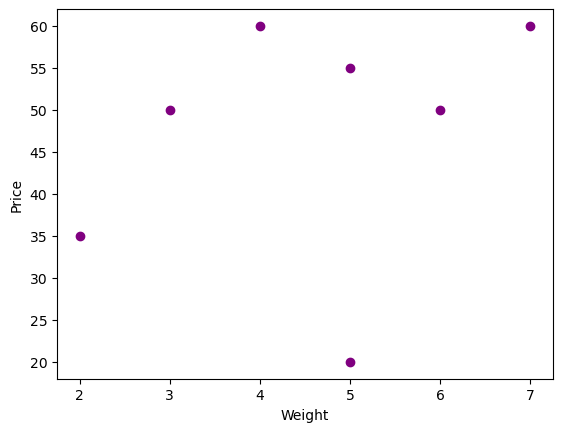

In [25]:
plt.scatter(df.Weight , df.Price, marker='o', color='purple')
plt.xlabel('Weight')
plt.ylabel('Price')

In [26]:
a = df.drop('Price', axis=1)
a

,Weight
0,2
1,4
2,5
3,3
4,6
5,5
6,7


In [27]:
b = df.drop('Weight', axis=1)
b

,Price
0,35
1,60
2,20
3,50
4,50
5,55
6,60


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
reg = LinearRegression()


In [30]:
reg.fit(a,b)

LinearRegression()

In [31]:
reg.coef_ # m

array([[2.62096774]])

In [32]:
reg.intercept_ # c

array([35.16129032])

In [33]:
reg.predict([[6]])

array([[50.88709677]])

In [34]:
df['Price_Predict'] = reg.predict(a) 
df

,Weight,Price,Price_Predict
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


In [35]:
df['Residuals'] = df[['Price']] - reg.predict(a)
df

,Weight,Price,Price_Predict,Residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


Text(0, 0.5, 'Price')

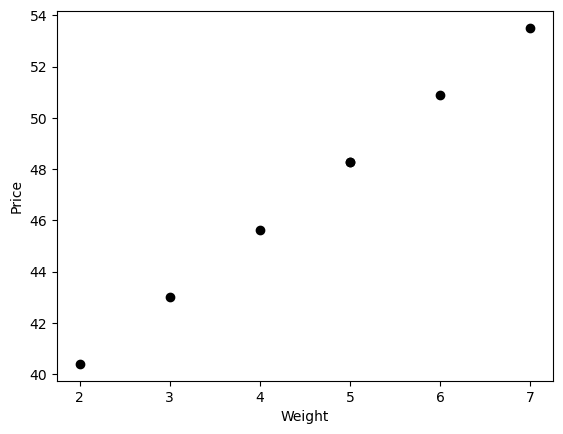

In [36]:
plt.scatter(df.Weight , df.Price_Predict, marker='o', color='black')
plt.xlabel('Weight')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

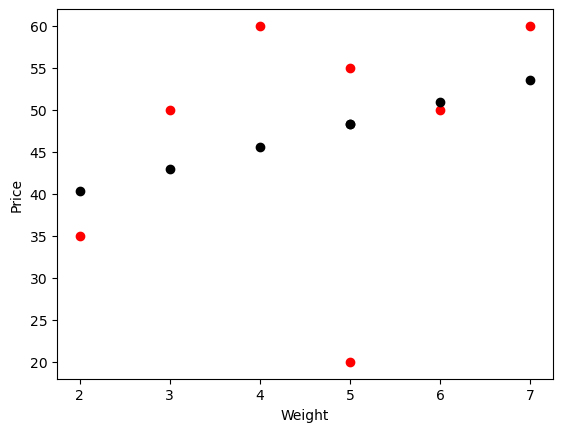

In [37]:
plt.scatter(df.Weight , df.Price, marker='o', color='red')
plt.scatter(df.Weight , df.Price_Predict, marker='o', color='black')
plt.xlabel('Weight')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

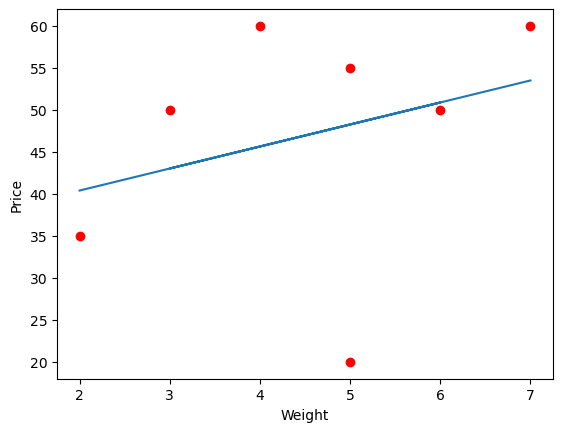

In [38]:
plt.scatter(df.Weight , df.Price, marker='o', color='red')
plt.plot(df.Weight , df.Price_Predict)
plt.xlabel('Weight')
plt.ylabel('Price')